### Repaso: Regresión Lineal + Feature Engineering

Situación: Eres analista en una empresa de energía. Tienes datos de temperatura exterior (°C) y consumo de energía (kWh). Sabes que la relación no es lineal.

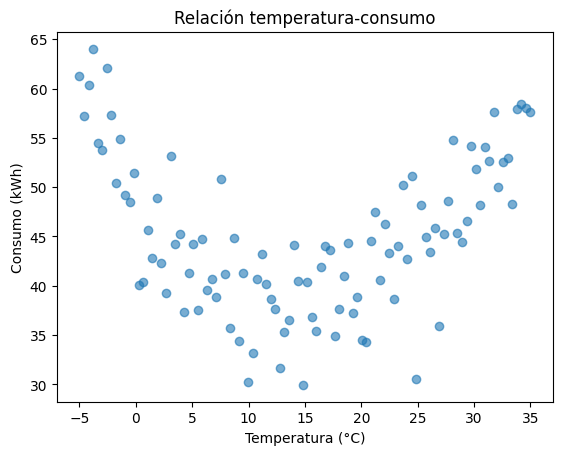

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
np.random.seed(42)
temperatura = np.linspace(-5, 35, 100)
consumo = 0.05 * temperatura ** 2 - 1.5 * temperatura + 50 + np.random.normal(0, 5, 100)

# Visualizar
plt.scatter(temperatura, consumo, alpha = 0.6)
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (kWh)')
plt.title('Relación temperatura-consumo')

plt.show()

#### Entendamos la ecuación

In [ ]:
consumo = 0.05 * temperatura**2 - 1.5 * temperatura + 50

Es una función cuadrática de la forma:

$$
f(t) = at^2 + bt + c
$$

donde:

* $a = 0.05$ (positivo, así que la parábola abre hacia arriba).
* $b = -1.5$
* $c = 50$

1. Comportamiento en los extremos

* Cuando la temperatura es muy baja o muy alta, el término $0.05⋅t^2$ domina, porque $t^2$ crece muy rápido.

2. El mínimo (vértice de la parábola)

* La parábola tiene un punto mínimo (vértice) en:

$$
t_{min} = \frac{-b}{a2}
$$

Sustituyendo:

$$
t_{min} = \frac{-1.5}{2 \cdot 0.05} = \frac{1.5}{0.1} = 15
$$

Entonces el consumo es mínimo alrededor de 15 °C.

Ahí la gente ni necesita calefacción ni aire acondicionado -> bajo consumo.

La razón por la que el consumo sube en bajas y altas temperaturas es el término cuadrático positivo (0.05 · t²), que hace que la parábola crezca en los extremos y tenga un mínimo en torno a 15°C.

Ejercicio:

1. Crea características polinómicas de grado 2 para la temperatura.
2. Entrena un modelo de regresión lineal con las características polinómicas.
3. Predice el consumo para una temperatura de 25°C.

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
temperatura = np.linspace(-5, 35, 100).reshape(-1, 1) # Reshape porque sklearn espera matriz
consumo = 0.05 * temperatura.flatten() ** 2 - 1.5 * temperatura.flatten() + 50 + np.random.normal(0, 5, 100)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(temperatura)

print("Shape original:", temperatura.shape)
print("Shape polinómico:", X_poly.shape)
print("Ejemplo de fila:", X_poly[0])

Shape original: (100, 1)
Shape polinómico: (100, 2)
Ejemplo de fila: [-5. 25.]


* temperatura.shape = (100, 1) porque hay 100 muestras con 1 variable.
* X_poly.shape = (100, 2) porque ahora tenemos [temp, temp²].
* Esto le da al modelo curvatura (aprende relaciones no lineales).

In [3]:
modelo = LinearRegression()

modelo.fit(X_poly, consumo)

print("Coeficientes:", modelo.coef_)
print("Intersección:", modelo.intercept_)

Coeficientes: [-1.55147935  0.0522907 ]
Intersección: 49.42595405084727


In [4]:
nueva_temp = np.array([[25]])

nueva_temp_poly = poly.transform(nueva_temp)

consumo_pred = modelo.predict(nueva_temp_poly)

print(f"Predicción de consumo para 25°C: {consumo_pred[0]:.2f} kWh")

Predicción de consumo para 25°C: 43.32 kWh


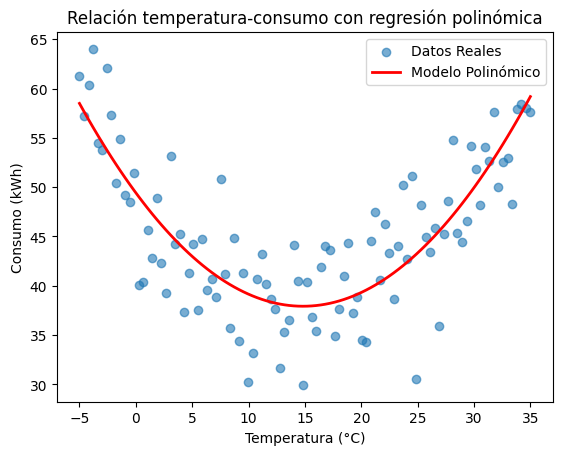

In [5]:
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_poly)

plt.scatter(temperatura, consumo, alpha = 0.6, label = "Datos Reales")
plt.plot(temperatura, y_pred, color = 'red', linewidth = 2, label = "Modelo Polinómico")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumo (kWh)")
plt.title("Relación temperatura-consumo con regresión polinómica")
plt.legend()

plt.show()

---